In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [156]:
# Imports the train data
train = pd.read_csv("train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [157]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [158]:
train.shape

(1460, 81)

In [159]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [160]:
corr = train.corr() # allows us to get the correlations
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


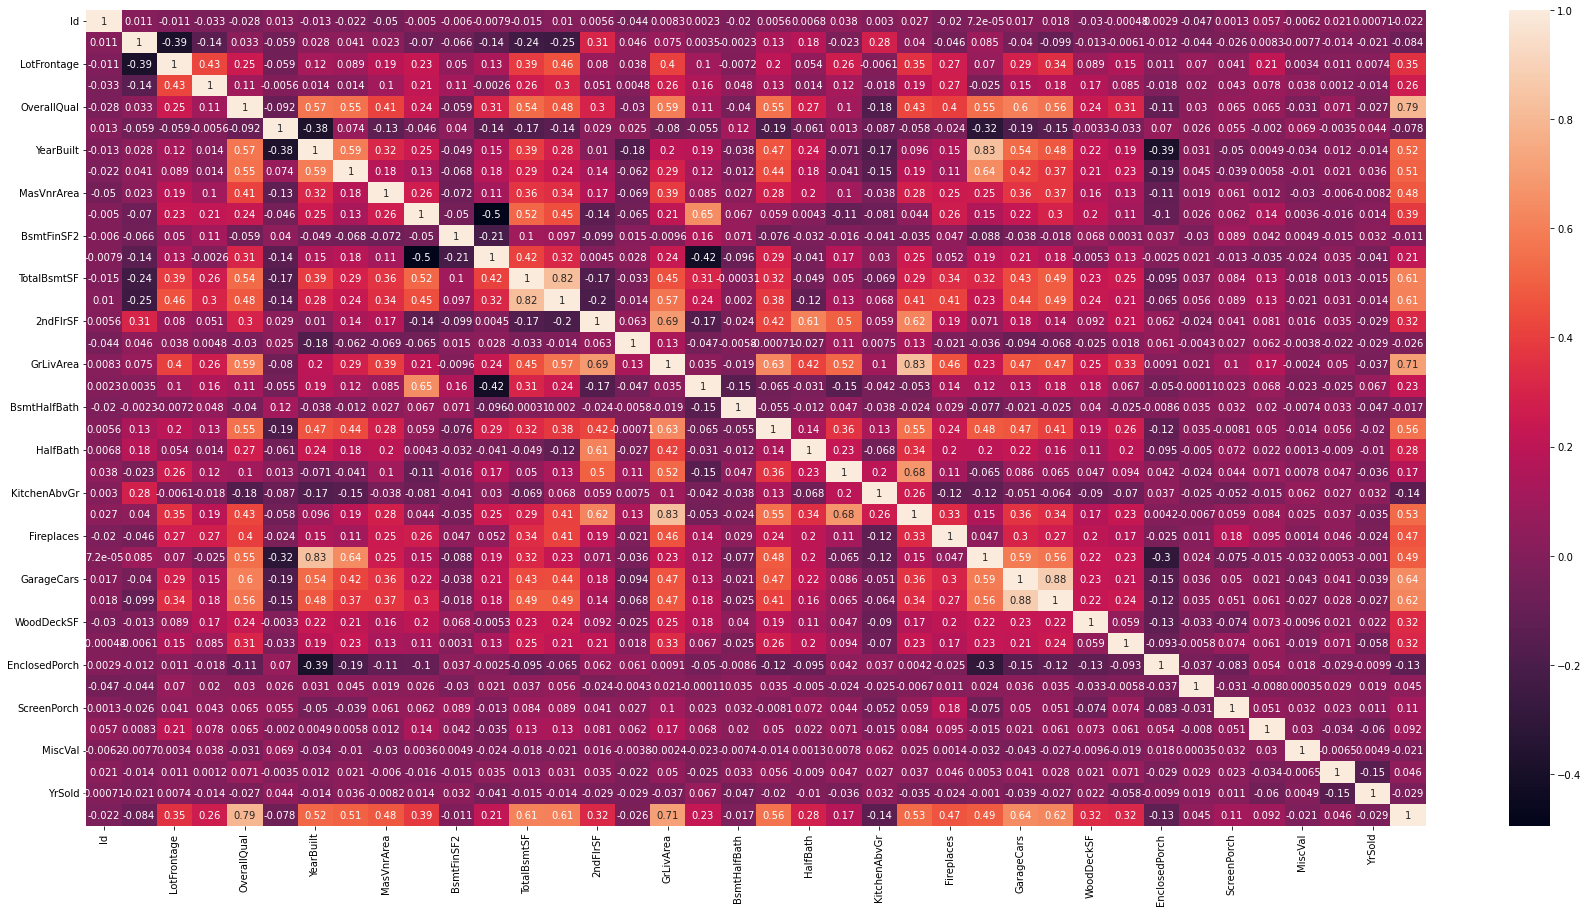

In [161]:
sns.heatmap(corr, annot=True) # annot=True adds the values
plt.gcf().set_size_inches(30, 15)

In [162]:
correlation_mat = train.corr().SalePrice.sort_values(ascending=False)
correlation_mat

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

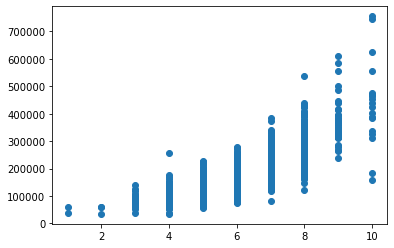

In [163]:
plt.scatter(train['OverallQual'],train['SalePrice'])

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

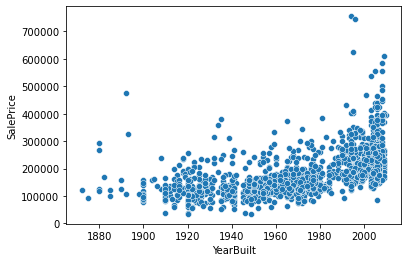

In [164]:
sns.scatterplot(data = train, x= 'YearBuilt', y = 'SalePrice')

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

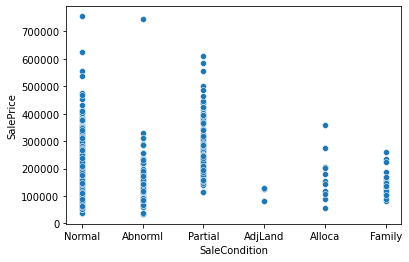

In [165]:
sns.scatterplot(data = train, x= 'SaleCondition', y = 'SalePrice')

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

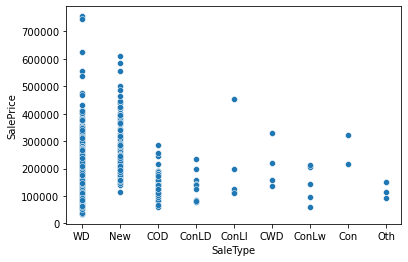

In [166]:
sns.scatterplot(data = train, x= 'SaleType', y = 'SalePrice')

In [167]:
# Prints the name of columns that has null values
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [168]:
train=train.dropna(axis=1,how='all')
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [169]:
train.shape

(1460, 81)

# Experiment 1

In [170]:
X1 = train[['OverallQual']]
y1 = train['SalePrice']
len(X1) == len(y1) #very nothing went wrong

True

In [171]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.5)

In [172]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model objlineect to our data
lr.fit(X_train1, y_train1)

LinearRegression()

In [173]:
# The coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [45259.79870482]
Intercept: 
 -96629.99890969758


In [174]:
y_pred1 = lr.predict(X_test1)

In [175]:
MAE1= metrics.mean_absolute_error(y_test1, y_pred1)
print('MAE: \n', MAE1)

MSE1= metrics.mean_squared_error(y_test1, y_pred1)
print('MSE: \n', MSE1)

RMSE1 = np.sqrt(MSE1)
print('RMSE: \n', RMSE1)

MAE: 
 32732.258548342423
MSE: 
 2264350664.740022
RMSE: 
 47585.19375541117


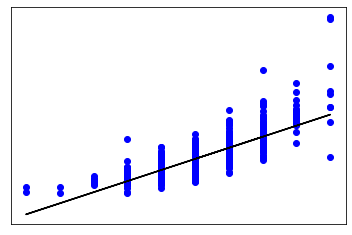

In [176]:
# Plot outputs
plt.scatter(X_test1, y_test1,  color='blue')
plt.plot(X_test1, y_pred1, color='black')
plt.xticks(())
plt.yticks(())
plt.show()

# Experiment 2

In [203]:
X2 = train[['YearBuilt']]
y2 = train['SalePrice']

In [204]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.5)

In [205]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train2, y_train2)

LogisticRegression()

In [206]:
y_pred2 = logisticRegr.predict(X_test2)

In [207]:
MAE2= metrics.mean_absolute_error(y_test2, y_pred2)
print('MAE: \n', MAE2)

MSE2= metrics.mean_squared_error(y_test2, y_pred2)
print('MSE: \n', MSE2)

RMSE2 = np.sqrt(MSE2)
print('RMSE: \n', RMSE2)

MAE: 
 61044.42191780822
MSE: 
 7142266577.69589
RMSE: 
 84511.93157002087


# Experiment 3

In [226]:
X3 = train[['YearBuilt','GarageCars','GrLivArea']]
y3 = train['SalePrice']
len(X3) == len(y3) #very nothing went wrong

True

In [232]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.5)

In [233]:
# Initialize a linear regression model object
lr3 = LinearRegression() 

# Fit the linear regression model objlineect to our data
lr3.fit(X_train3, y_train3)

LinearRegression()

In [234]:
# The coefficients
print('Coefficients: \n', lr3.coef_)
print('Intercept: \n', lr3.intercept_)

Coefficients: 
 [  811.29336674 23540.21063205    81.61787973]
Intercept: 
 -1584150.8037253697


In [235]:
y_pred3 = lr3.predict(X_test3)

In [236]:
MAE3= metrics.mean_absolute_error(y_test3, y_pred3)
print('MAE: \n', MAE3)

MSE3= metrics.mean_squared_error(y_test3, y_pred3)
print('MSE: \n', MSE3)

RMSE3 = np.sqrt(MSE3)
print('RMSE: \n', RMSE3)

MAE: 
 31012.092297930005
MSE: 
 2244982656.5490155
RMSE: 
 47381.24794208164
